In [480]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False
%matplotlib inline

In [481]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df.head() 

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89
2  2012-01-01 02:00:00  4542.6     0.0  45.04
3  2012-01-01 03:00:00  4357.7     0.0  45.03
4  2012-01-01 04:00:00  4275.5     0.0  42.61

In [482]:
df['timeStamp']=pd.to_datetime(df['timeStamp']) 

In [483]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


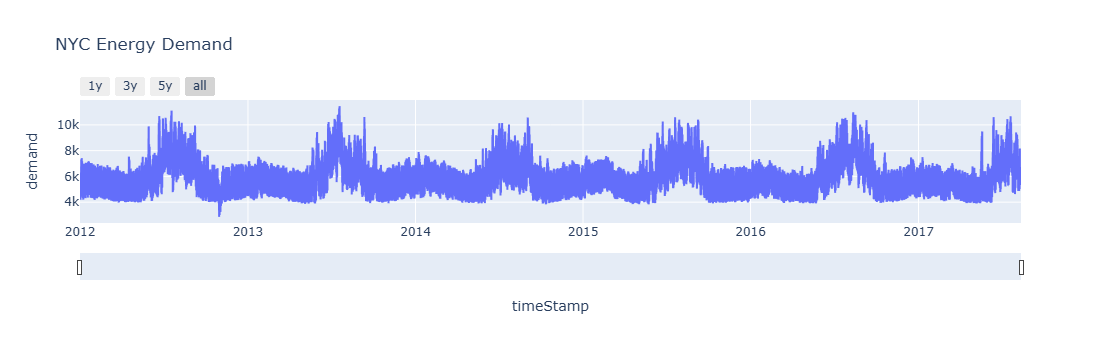

In [484]:
fig = px.line(df, x='timeStamp',y='demand', title='NYC Energy Demand')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all") 
        ]) 
    )
) 
fig.show() 

In [485]:
ny_df=df.set_index('timeStamp') 

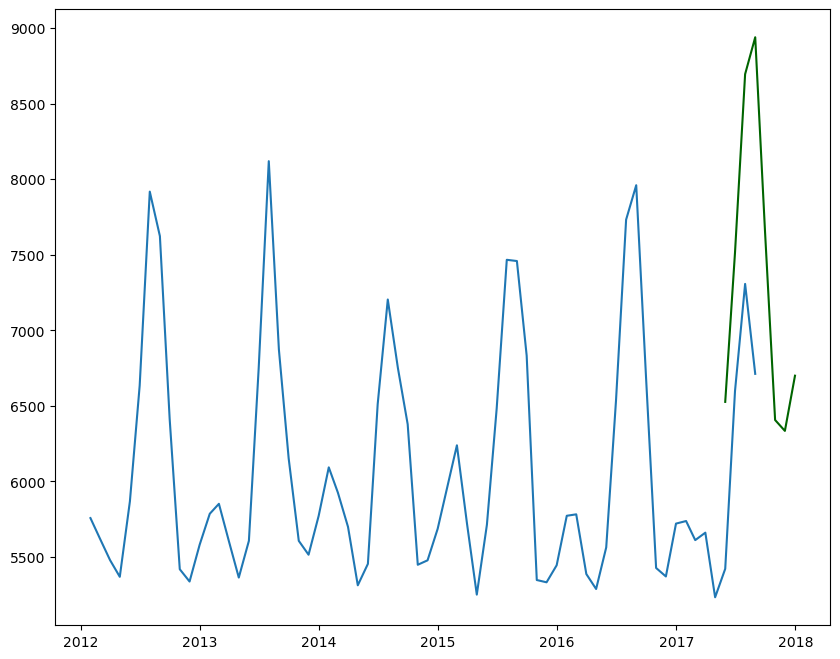

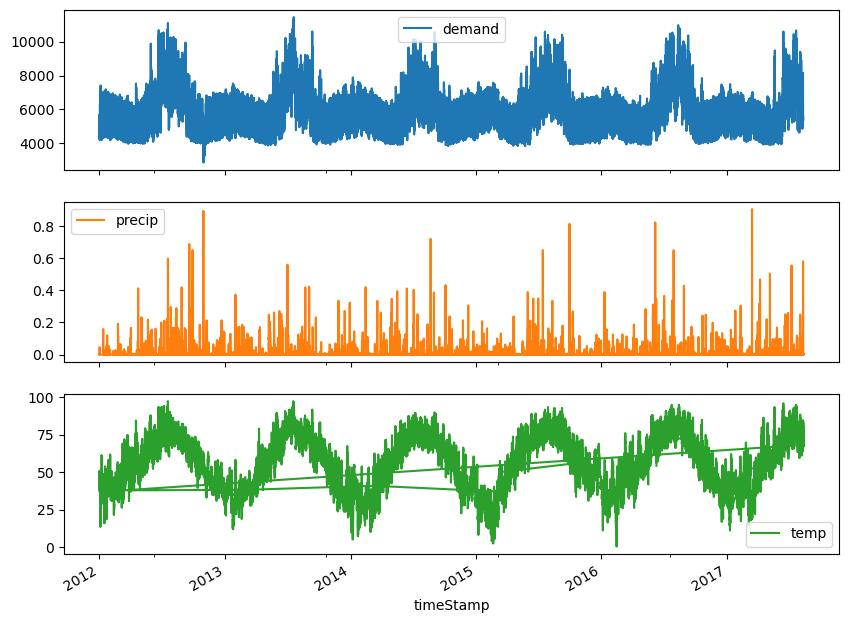

In [486]:
ny_df.plot(subplots=True) 
plt.show() 

In [487]:
print("Rows   : " , df.shape[0])
print("Columns : ", df.shape[1])
print("\nFeatures : \n" , df.columns.tolist()) 
print("\nMissing values :  ", df.isnull().any())
print("\nUnique values :  \n", df.nunique()) 

Rows   :  49205
Columns :  4

Features : 
 ['timeStamp', 'demand', 'precip', 'temp']

Missing values :   timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

Unique values :  
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [488]:
df.query('demand != demand') 

timeStamp  demand  precip   temp
49124 2012-03-11 02:00:00     NaN  0.0000  37.78
49125 2013-03-10 02:00:00     NaN  0.0000  38.18
49126 2014-03-09 02:00:00     NaN  0.0000  40.86
49127 2015-03-08 02:00:00     NaN  0.0000  36.96
49128 2015-03-11 11:00:00     NaN  0.0000  49.95
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 4 columns]

In [489]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill') 

C:\Users\Manish\AppData\Local\Temp\ipykernel_2792\192036640.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Manish\AppData\Local\Temp\ipykernel_2792\192036640.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [490]:
print("\nMissing values : ", df.isnull().any()) 


Missing values :  timeStamp    False
demand       False
precip        True
temp         False
dtype: bool


In [491]:
ny_df=df.set_index('timeStamp') 

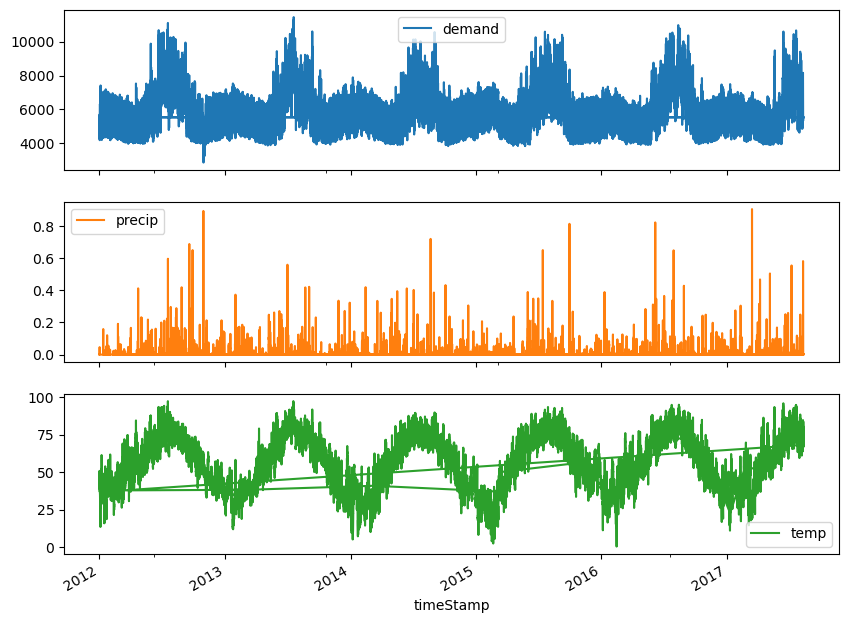

In [492]:
ny_df.plot(subplots=True) 
plt.show() 

In [493]:
ny_df.resample('ME').mean() 

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

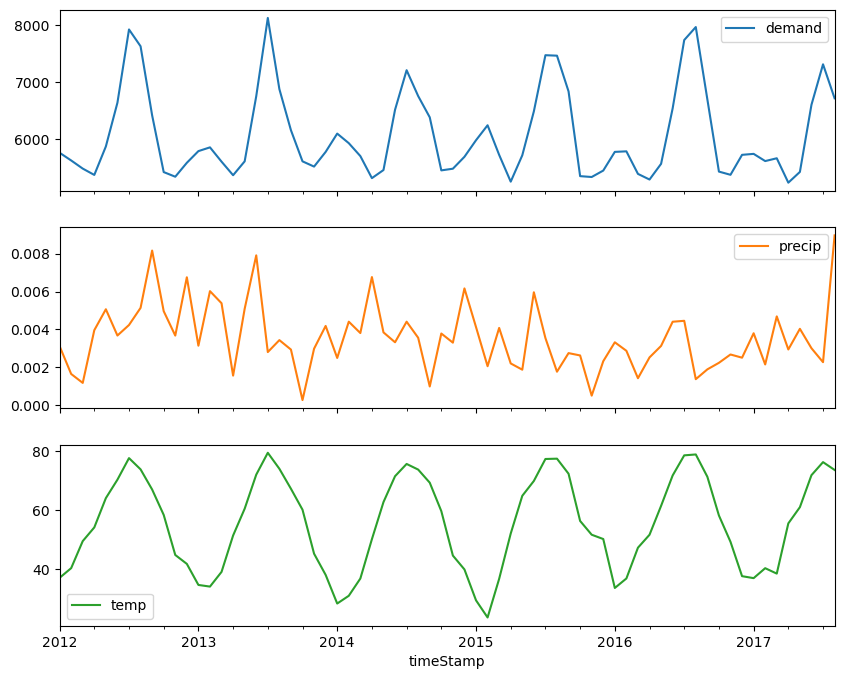

In [494]:
ny_df.resample('ME').mean().plot(subplots=True) 
plt.show() 

In [495]:
ny_df_monthly=ny_df.resample('ME').mean() 

In [496]:
import pmdarima as pm
model = pm.auto_arima(ny_df_monthly['demand'],
                      m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf', error_action='ignore', suppredd_warnings=True,stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1027.775, Time=1.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.718, Time=0.04 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.058, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.08 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1013.803, Time=1.32 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=i

In [497]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   68
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -494.421
Date:                             Tue, 24 Dec 2024   AIC                            998.843
Time:                                     18:10:16   BIC                           1009.940
Sample:                                 01-31-2012   HQIC                          1003.240
                                      - 08-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2597.6626    584.270      4.446      0.000    1452.514    3742.811
ar.L1         -0.1514      0.194     -0.779      0.436      -0.532       0.230
ma.L1          0.7902      0.153      5.167      0.000       0.490       1.090
ar.S.L12       0.6298      0.082      7.676      0.000       0.469       0.791
sigma2      1.094e+05   2.34e+04      4.677      0.000    6.35e+04    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.12   Jarque-Bera (JB):                14.76
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.96
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [498]:
ny_df_monthly

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

In [499]:
train=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') & (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')] 

In [500]:
test 

demand    precip       temp
timeStamp                                   
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

In [501]:
test.shape

(4, 3)

In [502]:
model.fit(train['demand']) 

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [503]:
forecast=model.predict(n_periods=4, return_conf_int=True) 

In [504]:
forecast

(2017-05-31    6526.291760
 2017-06-30    7514.409464
 2017-07-31    8694.633551
 2017-08-31    8938.656145
 Freq: ME, dtype: float64,
 array([[  156.13502981, 12896.44849106],
        [ 1143.8644016 , 13884.95452712],
        [ 2323.70870935, 15065.55839316],
        [ 2567.35988846, 15309.95240231]]))

In [505]:
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns=['Predictions'])

In [506]:
forecast_df

Predictions
timeStamp              
2017-05-31  6526.291760
2017-06-30  7514.409464
2017-07-31  8694.633551
2017-08-31  8938.656145

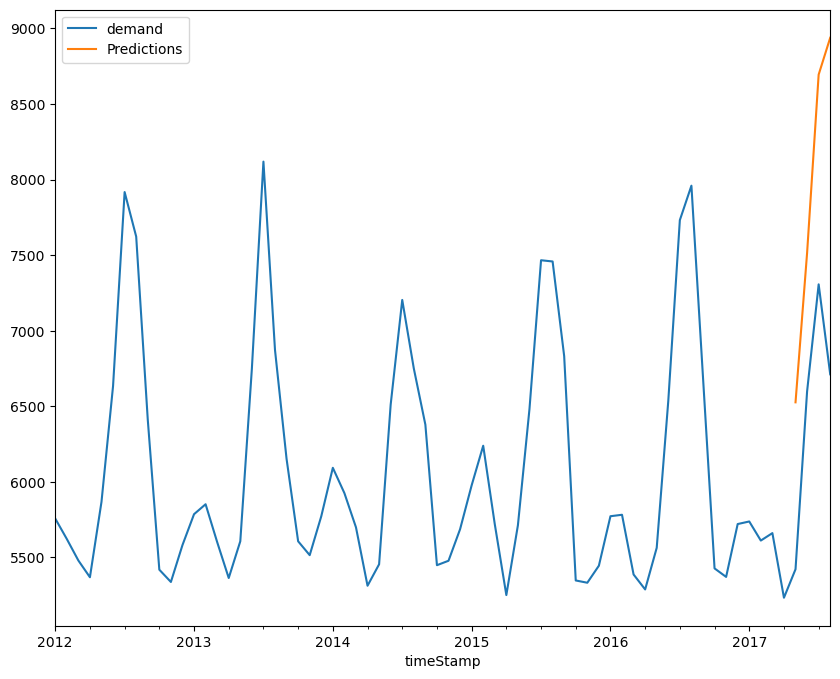

In [507]:
pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot() 
plt.show() 

In [508]:
forecast1=model.predict(n_periods=8, return_conf_int=True) 

In [509]:
forecast1

(2017-05-31    6526.291760
 2017-06-30    7514.409464
 2017-07-31    8694.633551
 2017-08-31    8938.656145
 2017-09-30    7656.101353
 2017-10-31    6406.369723
 2017-11-30    6334.397799
 2017-12-31    6699.616452
 Freq: ME, dtype: float64,
 array([[  156.13502981, 12896.44849106],
        [ 1143.8644016 , 13884.95452712],
        [ 2323.70870935, 15065.55839316],
        [ 2567.35988846, 15309.95240231],
        [ 1284.44186004, 14027.76084508],
        [   34.35499423, 12778.38445275],
        [  -37.96434432, 12706.75994313],
        [  326.91454338, 13072.31836053]]))

In [510]:
forecast_range=pd.date_range(start='2017-05-31',periods=8,freq="ME") 

In [511]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction']) 

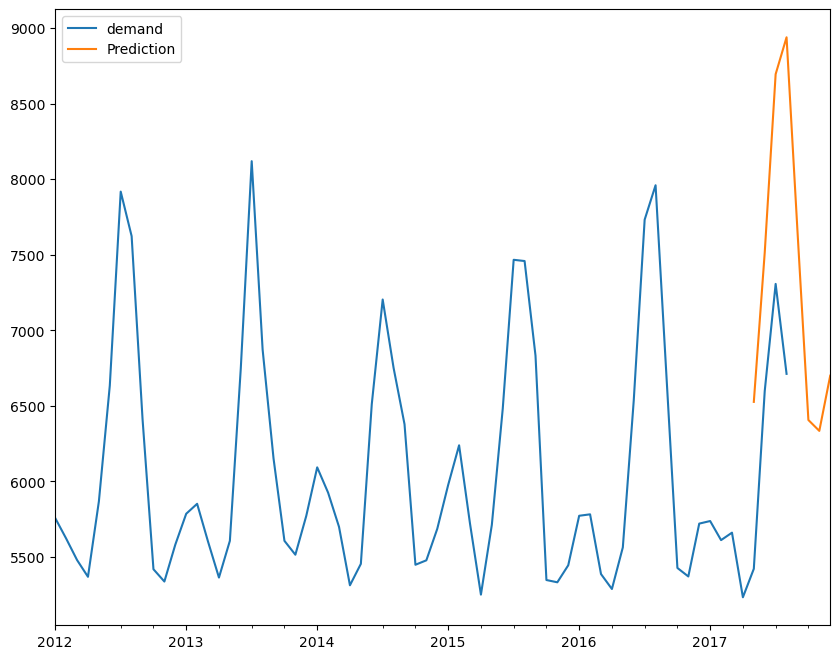

In [512]:
pd.concat([ny_df_monthly['demand'],forecast1_df],axis=1).plot() 
plt.show() 

In [513]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

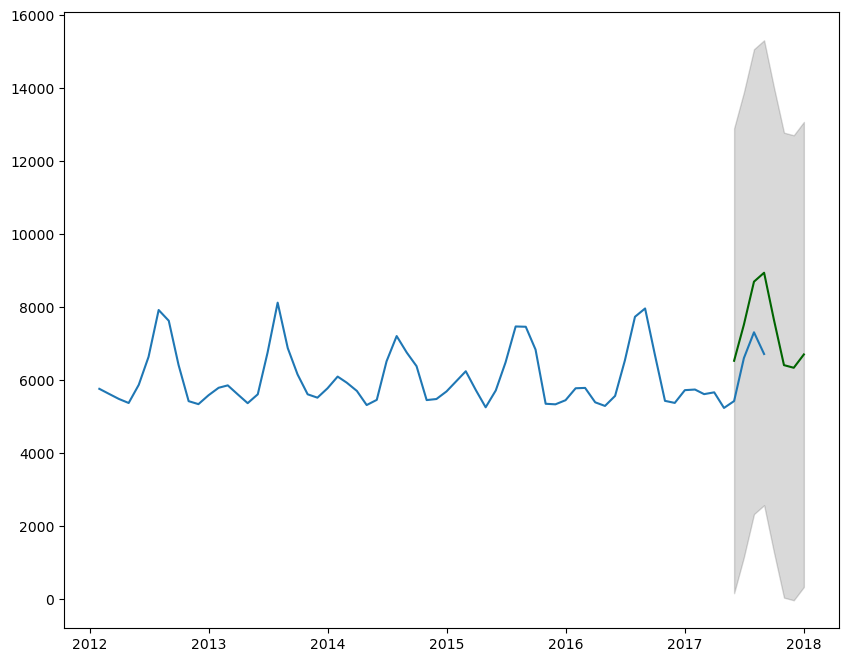

In [514]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)
plt.show() 

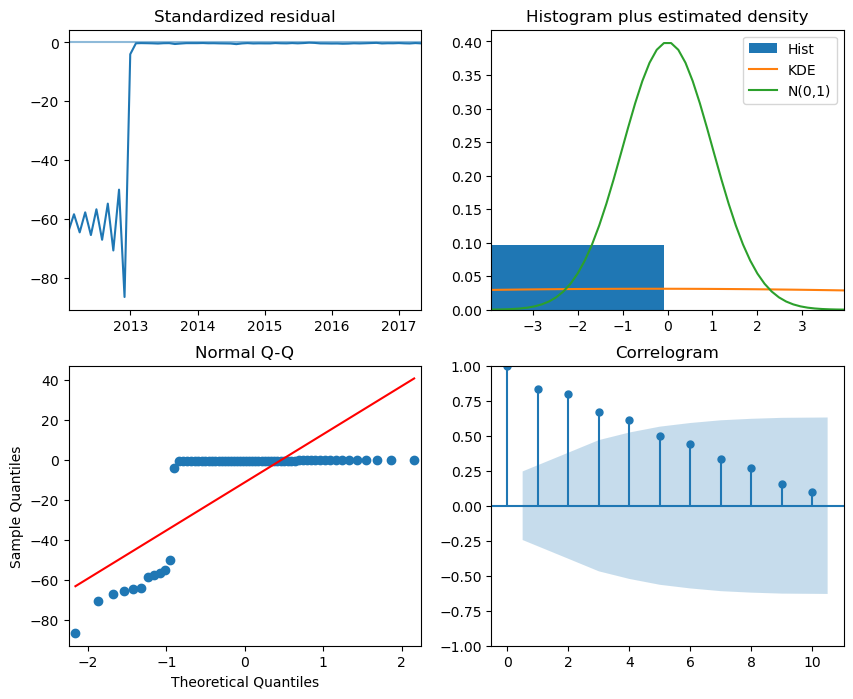

In [553]:
out=model.plot_diagnostics()
plt.show() 